<a href="https://colab.research.google.com/github/SridharAppusamy/CustomerReview-system/blob/main/Multiclass_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#reference Link : https://stackabuse.com/python-for-nlp-creating-multi-data-type-classification-models-with-keras/#creatingamodelwithmetainformationonly

from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The Dataset

Creating a Model with Text Inputs Only

Creating a Model with Meta Information Only

Creating a Model with Multiple Inputs

Final Thoughts and Improvements

In [ ]:
yelp_reviews = pd.read_csv("/content/drive/MyDrive/August Preparation 2023/20-Deep Learning/yelp_final.csv")
yelp_reviews.head()

,Unnamed: 0,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,useful,funny,cool,review_stars,text,date
0,4,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",KGZGa7Hnx6WiAVqtV_uizQ,0,0,0,5,Always ready to help us whenever we are in tow...,2018-04-29 23:23:56
1,7,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",grLyX22No_QBnaqYKlZp7w,4,0,0,5,Agree with the prior reviewers - Eric is top n...,2017-11-12 13:09:39
2,9,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",dyDqkUfU-656q7g4rN7JYw,50,1,1,5,Eric is AWESOME! He diagnosed problems in my ...,2017-11-02 02:50:11
3,11,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",PlidDkCMtxUoTiOc4G8bOQ,16,0,0,5,Eric came recommended to us by another RV owne...,2018-09-13 21:44:51
4,12,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",xjNRs75Q7tnu8MRucTC_zQ,0,0,0,5,Eric is one of the best. He knows the business...,2017-10-18 22:29:22


In [ ]:
bins = [0,1,3,5]
review_names = ['bad', 'average', 'good']
yelp_reviews['reviews_score'] = pd.cut(yelp_reviews['stars'], bins, labels=review_names)

In [ ]:
yelp_reviews.isnull().values.any()

print(yelp_reviews.shape)

yelp_reviews.head()

(2974, 20)


,Unnamed: 0,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,useful,funny,cool,review_stars,text,date,reviews_score
0,4,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",KGZGa7Hnx6WiAVqtV_uizQ,0,0,0,5,Always ready to help us whenever we are in tow...,2018-04-29 23:23:56,good
1,7,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",grLyX22No_QBnaqYKlZp7w,4,0,0,5,Agree with the prior reviewers - Eric is top n...,2017-11-12 13:09:39,good
2,9,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",dyDqkUfU-656q7g4rN7JYw,50,1,1,5,Eric is AWESOME! He diagnosed problems in my ...,2017-11-02 02:50:11,good
3,11,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",PlidDkCMtxUoTiOc4G8bOQ,16,0,0,5,Eric came recommended to us by another RV owne...,2018-09-13 21:44:51,good
4,12,SW_bePWPlMZJZGQ4eT9vrA,E's RV Appliance Repair,"1959 S Power Rd, Ste 103-238",Mesa,AZ,85206,33.379981,-111.68722,5.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Automotive, Water Heater Installation/Repair, ...",xjNRs75Q7tnu8MRucTC_zQ,0,0,0,5,Eric is one of the best. He knows the business...,2017-10-18 22:29:22,good


In [ ]:
yelp_reviews[['stars','reviews_score']].head(5)

,stars,reviews_score
0,5.0,good
1,5.0,good
2,5.0,good
3,5.0,good
4,5.0,good


In [ ]:
print(yelp_reviews["text"][3])

Eric came recommended to us by another RV owner. She said he was the best. She's right. He is knowledgeable and honest, and we wouldn't dream of calling anyone else for RV repairs or questions. Highly recommended.


<Axes: xlabel='reviews_score', ylabel='count'>

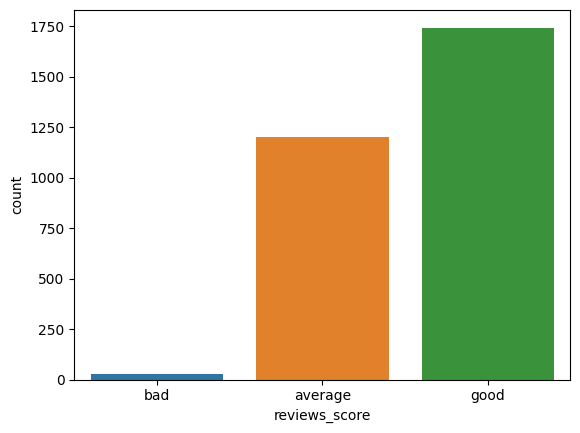

In [ ]:
import seaborn as sns

sns.countplot(x='reviews_score', data=yelp_reviews)

In [ ]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
sentences = list(yelp_reviews["text"])
X = []
sentences = list(yelp_reviews["text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = yelp_reviews['reviews_score']

In [ ]:
y[:3]

0    good
1    good
2    good
Name: reviews_score, dtype: category
Categories (3, object): ['bad' < 'average' < 'good']

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

In [ ]:
y[:5]

array([2, 2, 2, 2, 2])

In [ ]:
X[0:2]

['Always ready to help us whenever we are in town Knowledgeable honest and shows up when he says Eric is the man to call James Carrie Cameron',
 'Agree with the prior reviewers Eric is top notch in knowledge and service Had to remove the kitchen island in our fifth wheel just to get the frig out for repair Tight timeframe and required two appoints for the removal and then days later the replacement Still he fit us in despite very busy schedule and was educating me with how to tips the entire time he was here His local network is vast too Awesome guy to work with and competitive fees ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
y_train

array([0, 2, 0, ..., 2, 2, 0])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
X_train[0]

'I have worked with Little Dealer Little Prices for years They put new stove in my Living Quarters Horse trailer and did great job was in and out in timely manner sold that Living Quarters Horse Trailer and purchased different trailer had them work on my current trailer last year had to wait weeks to get an appointment had them work on my generator with other repairs got home turned on generator but won run my air conditioner Hummm you would think they would of tested that told them was leaving on trip the following week and need generator fixed They could not get me in for another week and definitely not before my trip So had somethings fixed but my generator was not one of them It hot here in September and no AC They got generator fixed after my trip it ran good all Fall This year go to start generator and it a not working So called and had to wait another wks to get an appointment use my horse trailer everyday to haul horses and ride told them this when made appointment Dropped trai

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train[0]

[100,
 17,
 216,
 14,
 205,
 248,
 205,
 306,
 9,
 221,
 8,
 228,
 63,
 1673,
 7,
 11,
 878,
 3315,
 1909,
 58,
 2,
 61,
 53,
 162,
 4,
 7,
 2,
 36,
 7,
 972,
 1092,
 563,
 12,
 878,
 3315,
 1909,
 58,
 2,
 226,
 340,
 58,
 19,
 37,
 54,
 13,
 11,
 1408,
 58,
 244,
 247,
 19,
 3,
 330,
 193,
 3,
 43,
 41,
 344,
 19,
 37,
 54,
 13,
 11,
 411,
 14,
 96,
 172,
 75,
 178,
 608,
 13,
 411,
 30,
 393,
 369,
 11,
 348,
 1151,
 16,
 32,
 294,
 8,
 32,
 10,
 2394,
 12,
 62,
 37,
 4,
 578,
 13,
 197,
 1,
 803,
 239,
 2,
 126,
 411,
 151,
 8,
 65,
 20,
 43,
 22,
 7,
 9,
 140,
 239,
 2,
 237,
 20,
 125,
 11,
 197,
 28,
 19,
 151,
 30,
 11,
 411,
 4,
 20,
 55,
 10,
 37,
 6,
 486,
 70,
 7,
 1739,
 2,
 48,
 468,
 8,
 75,
 411,
 151,
 59,
 11,
 197,
 6,
 765,
 88,
 39,
 1501,
 18,
 247,
 68,
 3,
 425,
 411,
 2,
 6,
 378,
 20,
 209,
 28,
 82,
 2,
 19,
 3,
 330,
 140,
 3,
 43,
 41,
 344,
 219,
 11,
 1909,
 58,
 2716,
 3,
 2232,
 2,
 920,
 62,
 37,
 18,
 40,
 133,
 344,
 483,
 58,
 77,
 13,
 557,
 121,
 

In [ ]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'was': 4,
 'we': 5,
 'it': 6,
 'in': 7,
 'they': 8,
 'for': 9,
 'of': 10,
 'my': 11,
 'that': 12,
 'on': 13,
 'with': 14,
 'is': 15,
 'you': 16,
 'have': 17,
 'this': 18,
 'had': 19,
 'not': 20,
 'our': 21,
 'me': 22,
 'rv': 23,
 'he': 24,
 'were': 25,
 'at': 26,
 'service': 27,
 'so': 28,
 'be': 29,
 'but': 30,
 'from': 31,
 'would': 32,
 'up': 33,
 'are': 34,
 'us': 35,
 'out': 36,
 'them': 37,
 'there': 38,
 'all': 39,
 'when': 40,
 'an': 41,
 'as': 42,
 'get': 43,
 'very': 44,
 'back': 45,
 'if': 46,
 'time': 47,
 'no': 48,
 'will': 49,
 'their': 50,
 'about': 51,
 'what': 52,
 'great': 53,
 'work': 54,
 'one': 55,
 'do': 56,
 'just': 57,
 'trailer': 58,
 'after': 59,
 'or': 60,
 'did': 61,
 'told': 62,
 'new': 63,
 'your': 64,
 'could': 65,
 'even': 66,
 'place': 67,
 'go': 68,
 'been': 69,
 'here': 70,
 'took': 71,
 'can': 72,
 'like': 73,
 'by': 74,
 'got': 75,
 'only': 76,
 'off': 77,
 'said': 78,
 'car': 79,
 'over': 80,
 'because': 81,
 'calle

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train

array([[ 369,   11,  348, ...,   44,  412,  108],
       [2717,  887,   11, ...,    0,    0,    0],
       [  31, 1053,   51, ...,   13,    1,  564],
       ...,
       [ 134,  703,   34, ...,    0,    0,    0],
       [   1, 2287,    2, ...,    0,    0,    0],
       [ 100,    1,   23, ...,    0,    0,    0]], dtype=int32)

built-in GloVe word embeddings.

In [ ]:
'''from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()'''

"from numpy import array\nfrom numpy import asarray\nfrom numpy import zeros\n\nembeddings_dictionary = dict()\n\nfor line in glove_file:\n    records = line.split()\n    word = records[0]\n    vector_dimensions = asarray(records[1:], dtype='float32')\n    embeddings_dictionary [word] = vector_dimensions\n\nglove_file.close()"

In [ ]:
X_train.shape

(3,)

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          1168200   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,285,835
Trainable params: 117,635
Non-trainable params: 1,168,200
_________________________________________________________________
None


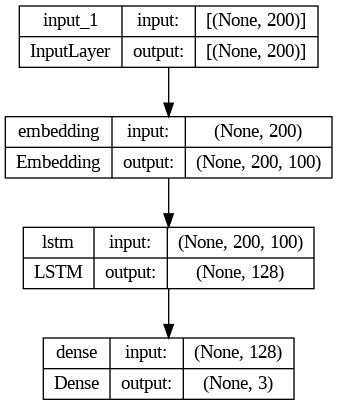

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=4, verbose=1, validation_split=0.2)

Epoch 1/4
15/15 [==============================] - 15s 729ms/step - loss: 0.8776 - acc: 0.5176 - val_loss: 0.7157 - val_acc: 0.6197
Epoch 2/4
15/15 [==============================] - 12s 831ms/step - loss: 0.7375 - acc: 0.5854 - val_loss: 0.7010 - val_acc: 0.6050
Epoch 3/4
15/15 [==============================] - 13s 906ms/step - loss: 0.7255 - acc: 0.5891 - val_loss: 0.6956 - val_acc: 0.6071
Epoch 4/4
15/15 [==============================] - 13s 832ms/step - loss: 0.7245 - acc: 0.5991 - val_loss: 0.6982 - val_acc: 0.6197


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

19/19 [==============================] - 2s 99ms/step - loss: 0.6951 - acc: 0.6336
Test Score: 0.6950615644454956
Test Accuracy: 0.6336134672164917


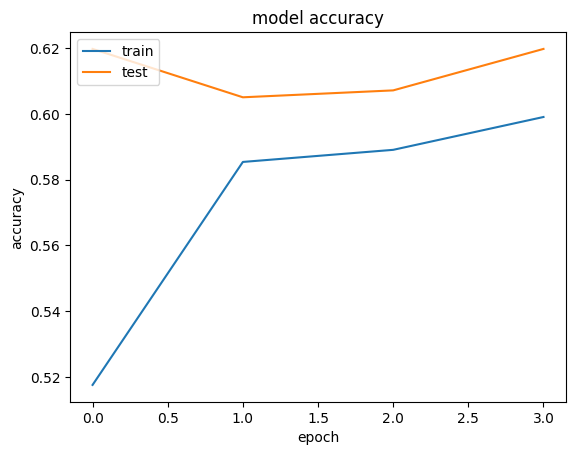

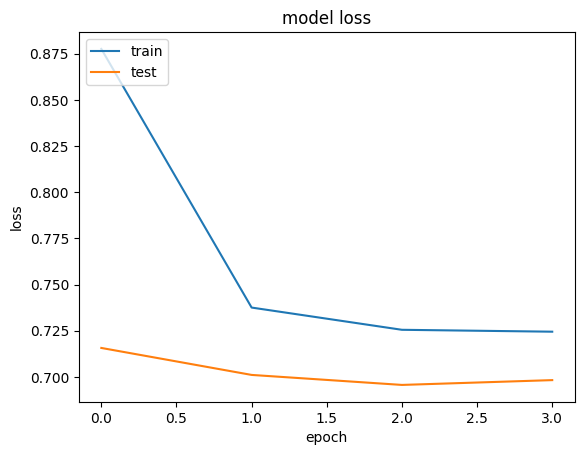

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


**Creating a Model with Meta Information Only**

<Axes: xlabel='reviews_score', ylabel='useful'>

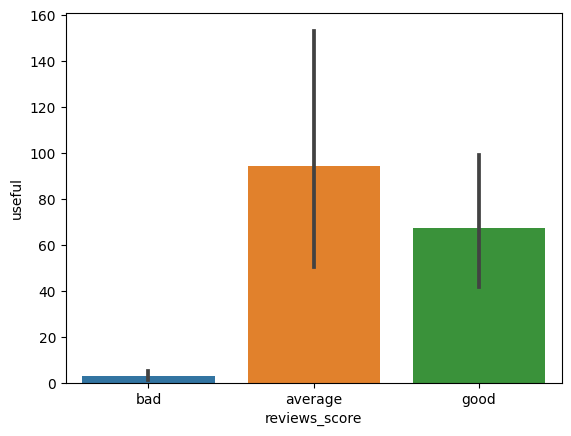

In [ ]:
import seaborn as sns
sns.barplot(x='reviews_score', y='useful', data=yelp_reviews)

<Axes: xlabel='reviews_score', ylabel='funny'>

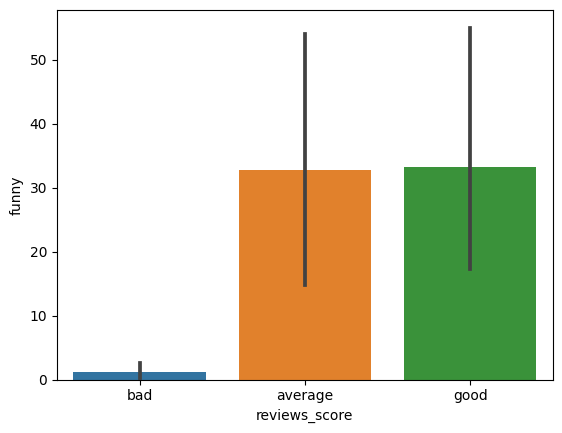

In [ ]:
sns.barplot(x='reviews_score', y='funny', data=yelp_reviews)

<Axes: xlabel='reviews_score', ylabel='cool'>

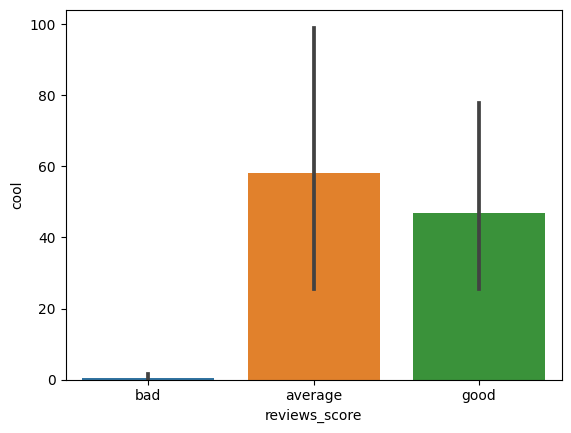

In [ ]:
sns.barplot(x='reviews_score', y='cool', data=yelp_reviews)

In [ ]:
yelp_reviews_meta = yelp_reviews[['useful', 'funny', 'cool']]

X = yelp_reviews_meta.values

y = yelp_reviews['reviews_score']

In [ ]:
X

array([[ 0,  0,  0],
       [ 4,  0,  0],
       [50,  1,  1],
       ...,
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [ ]:
y

0       good
1       good
2       good
3       good
4       good
        ... 
2969    good
2970    good
2971    good
2972    good
2973    good
Name: reviews_score, Length: 2974, dtype: category
Categories (3, object): ['bad' < 'average' < 'good']

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
X_train

array([[   7,    0,    1],
       [   0,    1,    0],
       [   9,    1,    1],
       ...,
       [   7,    0,    0],
       [2929, 1884, 1995],
       [   0,    0,    0]])

In [ ]:
input2 = Input(shape=(3,))
dense_layer_1 = Dense(10, activation='relu')(input2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(3, activation='softmax')(dense_layer_2)

model = Model(inputs=input2, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________
None


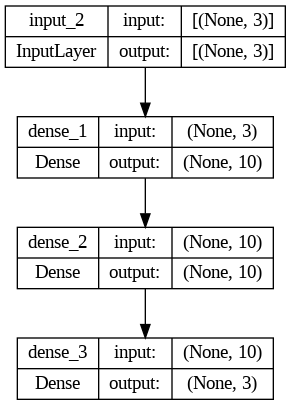

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=2, verbose=1, validation_split=0.2)

Epoch 1/2
119/119 [==============================] - 2s 6ms/step - loss: 3.1214 - acc: 0.4819 - val_loss: 4.8209 - val_acc: 0.5483
Epoch 2/2
119/119 [==============================] - 0s 4ms/step - loss: 1.8860 - acc: 0.5691 - val_loss: 4.5497 - val_acc: 0.6008


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

19/19 [==============================] - 0s 4ms/step - loss: 1.0848 - acc: 0.5916
Test Score: 1.0847629308700562
Test Accuracy: 0.5915966629981995


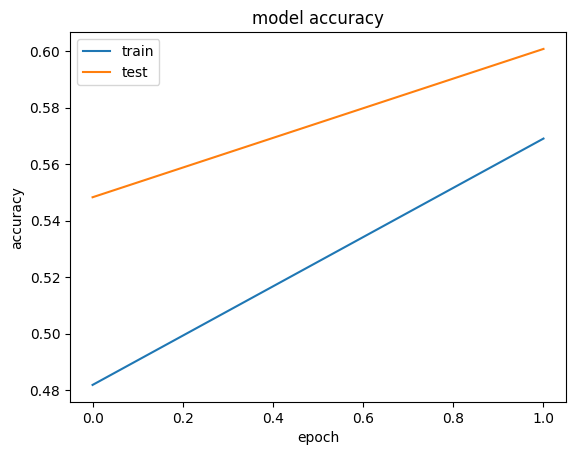

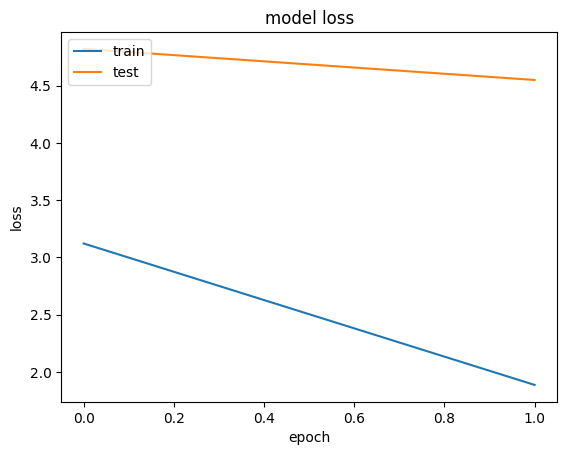

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Creating a Model with Multiple Inputs**

In [ ]:
X = yelp_reviews.drop('reviews_score', axis=1)

y = yelp_reviews['reviews_score']

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X1_train = []
sentences = list(X_train["text"])
for sen in sentences:
    X1_train.append(preprocess_text(sen))

In [ ]:
X1_test = []
sentences = list(X_test["text"])
for sen in sentences:
    X1_test.append(preprocess_text(sen))

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [ ]:
X1_train[0].shape

(200,)

In [ ]:
X1_train[0]

array([ 369,   11,  348, 1151,   16,   32,  294,    8,   32,   10, 2394,
         12,   62,   37,    4,  578,   13,  197,    1,  803,  239,    2,
        126,  411,  151,    8,   65,   20,   43,   22,    7,    9,  140,
        239,    2,  237,   20,  125,   11,  197,   28,   19,  151,   30,
         11,  411,    4,   20,   55,   10,   37,    6,  486,   70,    7,
       1739,    2,   48,  468,    8,   75,  411,  151,   59,   11,  197,
          6,  765,   88,   39, 1501,   18,  247,   68,    3,  425,  411,
          2,    6,  378,   20,  209,   28,   82,    2,   19,    3,  330,
        140,    3,   43,   41,  344,  219,   11, 1909,   58, 2716,    3,
       2232,    2,  920,   62,   37,   18,   40,  133,  344,  483,   58,
         77,   13,  557,  121,  168,    3,   29,  144,    8,  425,  209,
         13,   11,   58,  303,  506,    4,   11,  461,   86,  734,  218,
        557,   60, 1209,   82,   26, 1409,    2,    8,   62,   22,    8,
         25,  118,    3,  425,  209,   13,    6,  3

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/August Preparation 2023/20-Deep Learning/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix[0].shape

(100,)

In [ ]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X2_train = X_train[['useful', 'funny', 'cool']].values
X2_test = X_test[['useful', 'funny', 'cool']].values

In [ ]:
X2_train

array([[   7,    0,    1],
       [   0,    1,    0],
       [   9,    1,    1],
       ...,
       [   7,    0,    0],
       [2929, 1884, 1995],
       [   0,    0,    0]])

In [ ]:
input_1 = Input(shape=(maxlen,))

input_2 = Input(shape=(3,))

In [ ]:
input_1.shape

TensorShape([None, 200])

In [ ]:
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer)


In [ ]:
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [ ]:
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(3, activation='softmax')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 100)     1168200     ['input_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 10)           40          ['input_4[0][0]']                
                                                                                            

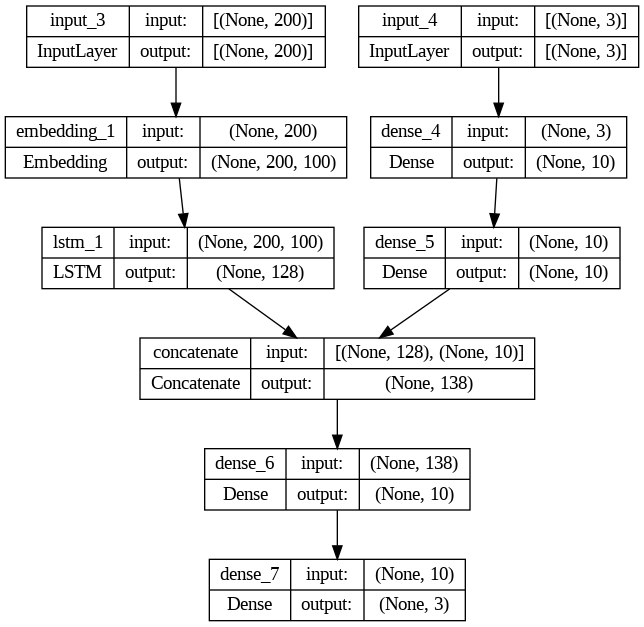

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=[X1_train, X2_train], y=y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)

Epoch 1/2
15/15 [==============================] - 17s 865ms/step - loss: 4.3828 - acc: 0.5738 - val_loss: 4.0795 - val_acc: 0.6008
Epoch 2/2
15/15 [==============================] - 14s 984ms/step - loss: 3.1972 - acc: 0.5460 - val_loss: 2.5995 - val_acc: 0.5903


In [ ]:
score = model.evaluate(x=[X1_test, X2_test], y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

19/19 [==============================] - 3s 148ms/step - loss: 3.4169 - acc: 0.5983
Test Score: 3.416940212249756
Test Accuracy: 0.5983193516731262


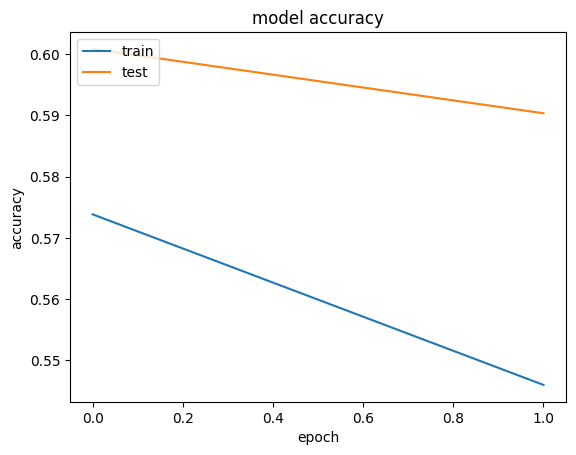

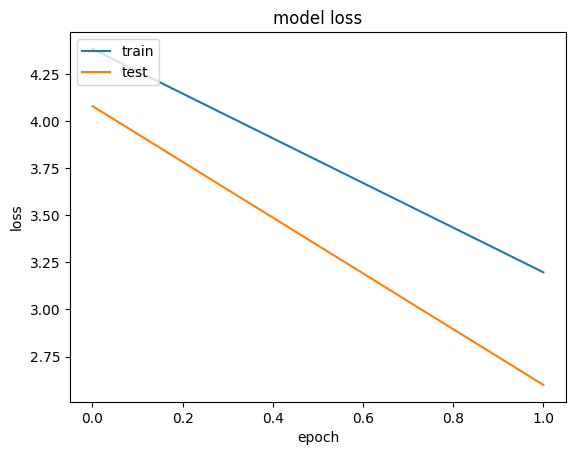

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()